# Introduction and 2D example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# generate and plot some synthetic data
mean1 = [1.0,1.5]
mean2 = [4.0,-2.0]
cov1 = [[2.0,1.0],[1.0,2.0]]
cov2 = [[3.0,0.0],[0.0,3.0]]

n = 100
x1 = np.random.multivariate_normal(mean1,cov1,n)
x2 = np.random.multivariate_normal(mean2,cov2,n)

plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.draw()

In [2]:
#select samples at random from each of the two populations to train the SVM
n_train = 10 # number of training samples from each dataset
training_labels = np.concatenate((np.zeros(n_train),np.ones(n_train)))
print(training_labels)
# Use the first n_train data points from x1 and x2 and combine them into a single matrix
training_data = np.concatenate((x1[0:n_train,:],x2[0:n_train,:]))
print(training_data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[-0.08614661  0.75198171]
 [-0.57061223 -0.12379815]
 [ 1.64257925  1.57450776]
 [ 2.03784263  3.57669101]
 [ 2.83996396  3.16308523]
 [ 2.18062664  2.63545886]
 [ 1.48469796  2.08200652]
 [-2.9721126  -0.86762094]
 [-2.28649718  0.76378097]
 [ 1.07907643  3.05474556]
 [ 2.38637474 -4.08792871]
 [ 5.1986395  -1.26038231]
 [ 5.55320272 -0.57325072]
 [ 7.30647588 -0.11748324]
 [ 2.22408242  2.64218314]
 [ 1.27926709  1.07018508]
 [ 5.42427615 -3.82111808]
 [ 2.63258139 -2.59583767]
 [ 4.76381111 -1.68672425]
 [ 4.9097265  -3.49725231]]


In [3]:
# Train the support vector machine
from sklearn import svm
svm2d = svm.SVC(kernel='linear')#kernel='rbf',gamma=0.5)
#svm2d = svm.SVC(kernel='rbf',gamma=0.05)
svm2d.fit(training_data,training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
# Apply the SVM to our dataset
test_data = np.concatenate((x1,x2))
predicted_labels = svm2d.predict(test_data)
print(predicted_labels)
print('Success rate on test data:')
actual_labels = np.concatenate((np.zeros(n),np.ones(n)))
print(np.sum(actual_labels == predicted_labels)/(2.0*n)) # This is the fraction of the predicted labels that match the correct labels
print('Success rate on training data:')
print(np.sum( training_labels == svm2d.predict(training_data))/(2.0*n_train) )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Success rate on test data:
0.955
Success rate on training data:
0.9


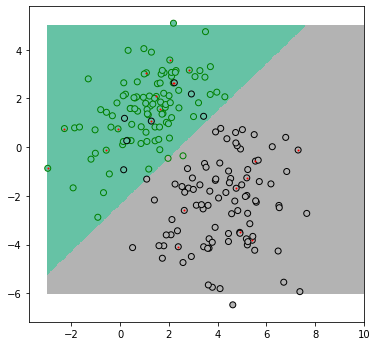

Caption: Face color denotes label from SVM. Edge color denotes correct group. Red dots denote data that were used to train SVM.


In [5]:
xg=np.linspace(-3,10,300) 
yg=np.linspace(-6,5,300)
xx,yy=np.meshgrid(xg,yg) # generate a grid of (x,y) points from the linspace vectors above
xvec = np.vstack((xx.ravel(),yy.ravel())).transpose() # convert the grid of points to a Nx2 vector
grid_labels = svm2d.predict(xvec) # label each of the points in the grid
grid_labels = grid_labels.reshape(xx.shape) # reshape the labels to have the same shape as the grid

# Visualize the classification:
plt.figure(figsize=(6,6))
cm = plt.get_cmap('Set2')
plt.pcolormesh(xx,yy,grid_labels,cmap=cm)
plt.scatter(x1[:,0],x1[:,1],c=svm2d.predict(x1),cmap=cm,edgecolors='g')
plt.scatter(x2[:,0],x2[:,1],c=svm2d.predict(x2),cmap=cm,edgecolors='k')
plt.plot(training_data[:,0],training_data[:,1],'r.',markersize=2)
ax=plt.gca()
ax.set_aspect('equal','box')
plt.show()
print("Caption: Face color denotes label from SVM. Edge color denotes correct group. Red dots denote data that were used to train SVM.")

# Exercise
In the cells above, what happens when you...
1. Increase the size of the training dataset?
2. Change the kernel in the SVM from 'linear' to 'rbf'?
3. Change the value of alpha from 'auto' to a number (e.g. 0.7)

# Application idea - automatic eruption detection from FLIR video

We will load video frames of an eruption of Lone Star geyser in Yellowstone National Park (an example will be displayed eventually). The video data were obtained using a FLIR A320 infrared camera with 320x240 resolution and 30 frames per second. The frames were then exported manually using the ExaminIR software. The temperature values are in degrees celsius and are reported to a precision of 0.1 degree.

We will try to train a support vector machine (SVM) to recognize when the geyser is erupting vs. quiescent. To do so, we will:

1. Define a function to generate a ''feature vector'' from the video frame. The feature vector should contain quantitative information that we think is likely to help the SVM distinguish eruptions from non-eruptions.
2. Manually assign labels to a subset of the video image (tedious, but necessary!)
3. Train the SVM using the labelled portion of the dataset
4. Apply the SVM to the entire dataset

In [6]:
resolution = (240,320)
npix=resolution[0]*resolution[1] # number of pixels
frames=[]

# define a function to calculate a 'feature vector' for the temperature image
def generate_feature_vector(frame,doplots=False):
    # maximum temperature
    maxt = np.max(frame)
    # minimum temperature
    mint = np.min(frame)
    # histogram of temperature values
    bins=np.linspace(0.0,110.0,20)
    counts,bin_edges = np.histogram(frame.ravel(),bins)
    feature_vector = np.concatenate(([maxt],[mint],counts))
    # calculate gradient of temperature
    #gx,gy = np.gradient(frame)
    #gmag = np.sqrt(gx**2+gy**2)
    # calculate histogram of gradients
    #bins=np.linspace(0.0,100.0,20)
    #gradient_counts,bin_edges = np.histogram(gmag.ravel(),bins)
    #if doplots:
    #    plt.figure()
    #    plt.imshow(gmag,cmap='jet')
    #    plt.colorbar()
    #    plt.show()
    feature_vector = np.concatenate(([maxt],[mint],counts)) # ,gradient_counts))
    return feature_vector

def read_file(number):
    filename = '/data/eruption18/Rec-lonestar-000018_{:d}.bin'.format(number)
    pixel_data = np.fromfile(filename,dtype='float32',count=npix).reshape(resolution)
    return pixel_data

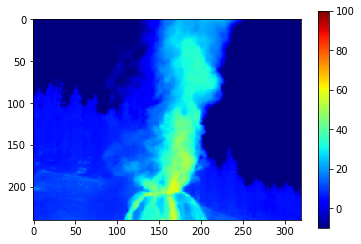

In [7]:
# Display frame 40000, to illustrate what the data look like:
data = read_file(40000)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(data,cmap='jet',vmin=-10,vmax=100)
plt.colorbar()
plt.show()

fv=generate_feature_vector(data,doplots=True)

In [ ]:
# display Ntraining frames at random and classify them as 'eruption' or 'no eruption'
import ipywidgets as widgets
%matplotlib notebook
Ntraining = 10      #NUMBER OF VIDEO FRAMES TO USE FOR TRAINING. 100 would be a good starting point
training_frames=np.array(np.random.rand(Ntraining)*50000,dtype='int')

idx=0
labels=[]

button_no = widgets.Button(description="No eruption")
button_steaming = widgets.Button(description="Steaming")
button_erupt = widgets.Button(description="Eruption")

data=read_file(training_frames[idx])
fig=plt.figure()
plt.imshow(data,cmap='jet',vmin=0,vmax=105)
plt.colorbar()
fig.canvas.draw()

def update_figure():
    data=read_file(training_frames[idx])
    ax=plt.gca()
    #ax.clear()
    ax.imshow(data,cmap='jet',vmin=0,vmax=105)
    ax.set_title('{:d}'.format(idx))
    fig.canvas.draw()
# Define a button for each 'class'
def click_steaming(b):
    global idx
    labels.append(1)
    idx+=1
    update_figure()
    
def click_erupt(b):
    print(b)
    global idx
    labels.append(2)
    idx+=1
    update_figure()
    
def click_no(b):
    global idx
    labels.append(0)
    idx+=1
    update_figure()

button_no.on_click(click_no)
button_erupt.on_click(click_erupt)
button_steaming.on_click(click_steaming)

items = [button_no,button_steaming,button_erupt]
widgets.Box(items)

In [8]:
# optionally, save your classification
#print(training_frames)
#print(training_labels)
#np.save('my_labels.npy',(training_frames,labels))

In [18]:
# optionally, load labels
test = np.load('max_labels.npy')
training_frames = test[0]
training_labels = test[1]

In [19]:
# calculate feature vectors for all of the files.
generate_feature_vectors = False
if generate_feature_vectors:
    from tqdm import tqdm,tqdm_notebook # this package makes a really nice-looking progress bar
    N=50000
    feature_vectors = []
    vertical_slice = []
    for i in tqdm_notebook(range(1,N)):    
        pixel_data = read_file(i)
        # form a feature vector for this image
        fv = generate_feature_vector(pixel_data)
        feature_vectors.append(fv)
        vertical_slice.append(pixel_data[:,160]) # save a column of pixels near the center of the image, for plotting later
    vertical_slice = np.array(vertical_slice)
    np.save('max_featurevectors.npy',feature_vectors)
    np.save('vertical_slice.npy',vertical_slice)
else:
    feature_vectors = np.load('max_featurevectors.npy')
    vertical_slice = np.load('vertical_slice.npy')
# optionally, save the feature vectors

In [20]:
print(feature_vectors)
training_feature_vectors = feature_vectors[training_frames,:]
print(training_feature_vectors.shape)

[[   56.32374954   -64.55368042 20600.         ...     0.
      0.             0.        ]
 [   56.16101837   -64.75208282 20632.         ...     0.
      0.             0.        ]
 [   56.33729935   -64.95139313 20674.         ...     0.
      0.             0.        ]
 ...
 [   54.06917191   -62.68032837  2955.         ...     0.
      0.             0.        ]
 [   54.08295059   -62.36515045  2908.         ...     0.
      0.             0.        ]
 [   53.50310898   -62.55398941  2863.         ...     0.
      0.             0.        ]]
(100, 21)


Description and documentation:
https://scikit-learn.org/stable/modules/svm.html

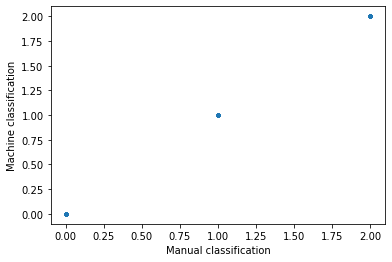

In [21]:
from sklearn import svm
clf = svm.SVC(gamma=0.05)#kernel='rbf')
clf.fit(training_feature_vectors,training_labels)
tmp = clf.predict(training_feature_vectors)
plt.figure()
plt.plot(training_labels,tmp,'.')
plt.xlabel('Manual classification')
plt.ylabel('Machine classification')
plt.show()

In [22]:
# classify all of the video frames
codes = clf.predict(feature_vectors)

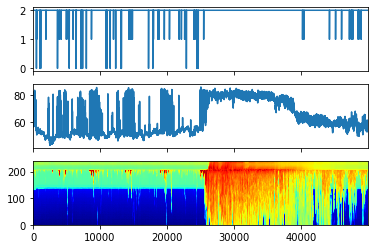

In [28]:
fig,ax = plt.subplots(3,1,sharex=True)
ax[0].plot(codes)
ax[1].plot(feature_vectors[:,0])
ax[2].pcolormesh(vertical_slice.transpose(),cmap='jet')
plt.show()